                                                        Programming Assignment - 3

#### Association Rule Generation from Transaction Data

In [39]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
grocery= pd.read_csv('Grocery_Items_9.csv').values
flattened_items = grocery.flatten()
flattened_items = pd.Series(flattened_items).dropna()
item_counts = flattened_items.value_counts()

print("Number of records :"  +str(pd.read_csv('Grocery_Items_9.csv').shape[0]) )
print("Number of unique items : " +str(flattened_items.nunique()))
print("most_popular_item :" +str(item_counts.idxmax()))
print("most_popular_item_count :" +str(item_counts.max()))

new_data=[]
for i in range(len(grocery)):
    new_list = [item for item in grocery[i] if not(pd.isnull(item)) == True]
    new_data.append(new_list)

Number of records :8000
Number of unique items : 166
most_popular_item :whole milk
most_popular_item_count :1341


In [40]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(new_data).transform(new_data)
final_data = pd.DataFrame(te_ary, columns=te.columns_)

final_data.head(3)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
from mlxtend.frequent_patterns import apriori,association_rules

def generate_rules(data, support, conf):
    frequent_itemsets = apriori(data, min_support=support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf,num_itemsets=frequent_itemsets.shape[0])
    return rules


In [41]:
generate_rules(final_data,0.01,0.08)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(rolls/buns),(other vegetables),0.109000,0.122375,0.010375,0.095183,0.777802,1.0,-0.002964,0.969948,-0.242781,0.046946,-0.030983,0.089982
1,(other vegetables),(rolls/buns),0.122375,0.109000,0.010375,0.084780,0.777802,1.0,-0.002964,0.973537,-0.245573,0.046946,-0.027183,0.089982
2,(soda),(other vegetables),0.100750,0.122375,0.011000,0.109181,0.892185,1.0,-0.001329,0.985189,-0.118463,0.051856,-0.015034,0.099534
3,(other vegetables),(soda),0.122375,0.100750,0.011000,0.089888,0.892185,1.0,-0.001329,0.988065,-0.121029,0.051856,-0.012079,0.099534
4,(whole milk),(other vegetables),0.159875,0.122375,0.016000,0.100078,0.817799,1.0,-0.003565,0.975224,-0.209606,0.060094,-0.025406,0.115412
5,(other vegetables),(whole milk),0.122375,0.159875,0.016000,0.130746,0.817799,1.0,-0.003565,0.966489,-0.202463,0.060094,-0.034673,0.115412
6,(rolls/buns),(whole milk),0.109000,0.159875,0.013500,0.123853,0.774688,1.0,-0.003926,0.958886,-0.246092,0.052863,-0.042877,0.104147
7,(whole milk),(rolls/buns),0.159875,0.109000,0.013500,0.084441,0.774688,1.0,-0.003926,0.973176,-0.257163,0.052863,-0.027563,0.104147
8,(soda),(whole milk),0.100750,0.159875,0.012750,0.126551,0.791561,1.0,-0.003357,0.961848,-0.226502,0.051437,-0.039666,0.103150
9,(yogurt),(whole milk),0.085750,0.159875,0.011500,0.134111,0.838848,1.0,-0.002209,0.970245,-0.173643,0.049119,-0.030667,0.103021


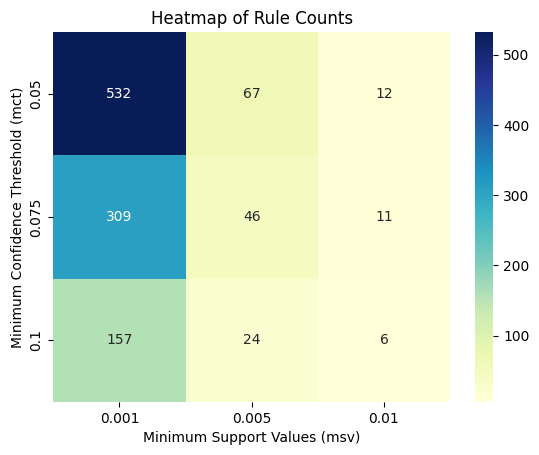

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
# Function to plot the heatmap
def plot_sns(msv, mct):
    results = []

    # Loop through msv and mct to calculate rule counts
    for s in msv:
        for c in mct:
            rule_count = len(generate_rules(final_data, s, c))
            results.append({'msv': s, 'mct': c, 'count': rule_count})

    # Create a DataFrame from results
    df = pd.DataFrame(results)

    # Correct pivot syntax
    heatmap_data = df.pivot(index="mct", columns="msv", values="count")

    # Plot the heatmap
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Heatmap of Rule Counts")
    plt.xlabel("Minimum Support Values (msv)")
    plt.ylabel("Minimum Confidence Threshold (mct)")
    plt.show()

# Parameters
msv = [0.001, 0.005, 0.01]
mct = [0.05, 0.075, 0.1]

# Plot the heatmap
plot_sns(msv, mct)


In [43]:
dir1 = 'cropped_images/n02090379-redbone/'
dir2 = 'cropped_images/n02097047-miniature_schnauzer/'
dir3 = 'cropped_images/n02104365-schipperke/'
dir4 = 'cropped_images/n02112018-Pomeranian/'

In [49]:
def plt_model_accuracy(history):
    tacc = history.history['accuracy']
    vacc = history.history['val_accuracy']
    epochs = range(1, len(tacc) + 1)
    plt.plot(epochs, tacc , label='Training-accuracy')
    plt.plot(epochs, vacc, label='Validation-accuracy')
    plt.title('accuracy curves')
    plt.xlabel('Number Of Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


def get_imageslabels(directory):
    img = []
    breed = []
    for name in os.listdir(directory):
        if name.endswith(".jpg") or name.endswith(".png"):
            imgs = load_img(os.path.join(directory, name), target_size=(128,128))  # Load image and resize
            img_array = img_to_array(imgs)  # Convert to numpy array (128, 128, 3)
            img.append(img_array)  # Add to list of images
            if directory == dir1:
                breed.append(0)  # Label for Redbone
            elif directory == dir2:
                breed.append(1)  # Label for Miniature Schnauzer
            elif directory == dir3:
                breed.append(2)  # Label for Schipperke
            elif directory == dir4:
                breed.append(3)  # Label for Pomeranian
    return np.array(img), np.array(breed)  # Return numpy arrays

In [50]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.model_selection import train_test_split
import os




# Get images and labels for each breed, handling potential empty directories
images1, labels1 = get_imageslabels(dir1)
images2, labels2 = get_imageslabels(dir2)
images3, labels3 = get_imageslabels(dir3)
images4, labels4 = get_imageslabels(dir4)


# Check if any image array is empty, and skip it if necessary
image_arrays = [images1, images2, images3, images4]
label_arrays = [labels1, labels2, labels3, labels4]

# Filter out empty arrays
image_arrays = [arr for arr in image_arrays if arr.size > 0] #filter empty array
label_arrays = [arr for arr in label_arrays if arr.size > 0]

# Concatenate only non-empty arrays
img = np.concatenate(image_arrays, axis=0) if image_arrays else np.array([])
breed = np.concatenate(label_arrays, axis=0) if label_arrays else np.array([])


# Convert breed labels to categorical (2D array)
breed = to_categorical(breed, num_classes=4)  # Ensure there are 4 classes, adjust num_classes as needed

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(img, breed, test_size=0.2, random_state=42)

# Normalize the images to a range of [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0

### Banner ID : 916493502

#####  (a) Train the CNN using 2 other filter sizes: 5 ×5 and 7×7 for the 2nd convolution layer (i) with
 all other parameters unchanged

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt

def model(Filter):
    model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (Filter, Filter), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
    plt_model_accuracy(history)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - accuracy: 0.3511 - loss: 1.3154 - val_accuracy: 0.3619 - val_loss: 1.2229
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - accuracy: 0.4703 - loss: 1.1407 - val_accuracy: 0.3810 - val_loss: 1.1939
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 364ms/step - accuracy: 0.4866 - loss: 1.1155 - val_accuracy: 0.5048 - val_loss: 1.1152
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 230ms/step - accuracy: 0.5572 - loss: 1.0066 - val_accuracy: 0.5429 - val_loss: 1.0929
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.6022 - loss: 0.9690 - val_accuracy: 0.5333 - val_loss: 1.0660
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 303ms/step - accuracy: 0.5992 - loss: 0.9806 - val_accuracy: 0.5714 - val_loss: 1.0545
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - accuracy: 0.6139 - loss: 0.8948 - val_accuracy: 0.5905 - val_loss: 1.0542
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 250ms/step - accuracy: 0.6325 - loss: 0.9280 - val_accuracy: 0.

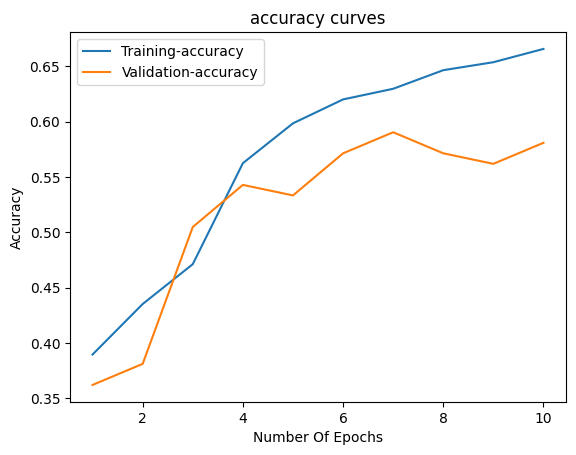

In [52]:
model(3)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - accuracy: 0.3430 - loss: 1.2727 - val_accuracy: 0.3619 - val_loss: 1.1530
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 440ms/step - accuracy: 0.4441 - loss: 1.1109 - val_accuracy: 0.3619 - val_loss: 1.1260
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.4626 - loss: 1.0401 - val_accuracy: 0.5048 - val_loss: 1.0676
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 283ms/step - accuracy: 0.5467 - loss: 0.9540 - val_accuracy: 0.5429 - val_loss: 0.9844
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.5760 - loss: 0.9260 - val_accuracy: 0.5524 - val_loss: 0.9587
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step - accuracy: 0.6112 - loss: 0.8839 - val_accuracy: 0.5905 - val_loss: 0.9399
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step - accuracy: 0.6410 - loss: 0.8355 - val_accuracy: 0.5810 - val_loss: 0.8694
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 350ms/step - accuracy: 0.6804 - loss: 0.7572 - val_accuracy: 0.

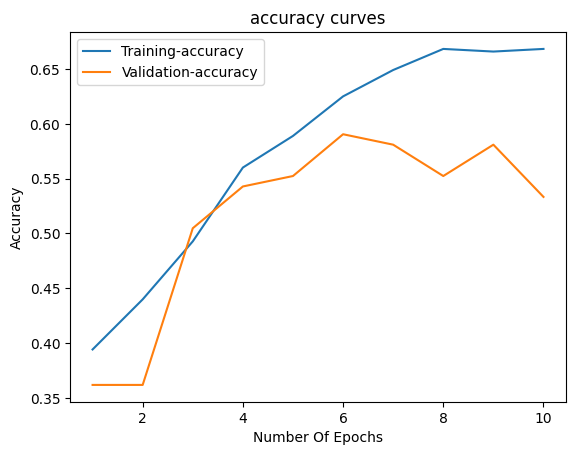

In [53]:
model(5)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 428ms/step - accuracy: 0.4364 - loss: 1.2908 - val_accuracy: 0.3619 - val_loss: 1.2199
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 492ms/step - accuracy: 0.4152 - loss: 1.1307 - val_accuracy: 0.3810 - val_loss: 1.1541
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 456ms/step - accuracy: 0.4911 - loss: 1.0423 - val_accuracy: 0.6000 - val_loss: 1.0880
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 378ms/step - accuracy: 0.6379 - loss: 0.9080 - val_accuracy: 0.6000 - val_loss: 1.0122
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 546ms/step - accuracy: 0.6372 - loss: 0.8456 - val_accuracy: 0.6000 - val_loss: 0.9480
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 388ms/step - accuracy: 0.6417 - loss: 0.7752 - val_accuracy: 0.6190 - val_loss: 1.0712
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 538ms/step - accuracy: 0.7127 - loss: 0.6665 - val_accuracy: 0.6190 - val_loss: 0.9656
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 383ms/step - accuracy: 0.7105 - loss: 0.6050 - val_accuracy: 0

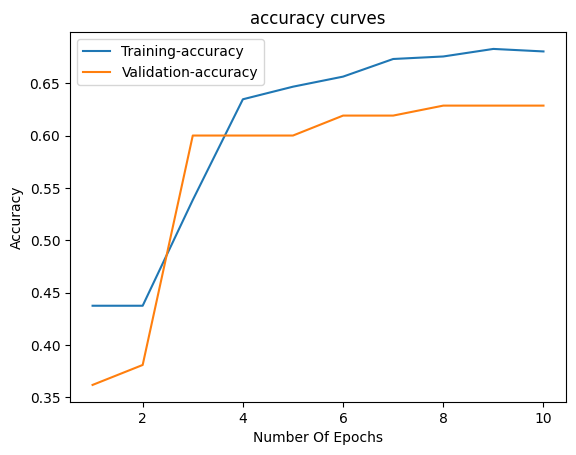

In [54]:
model(7)

##### The first model underperforms, with a validation accuracy of 48.89% and high validation loss (1.0777), suggesting underfitting. Its limited architecture struggles to capture the complexity of the task, resulting in poor generalization.

##### The second model (Model 5) performs best, with a validation accuracy of 71.85% and low validation loss (0.6835). It balances learning and generalization effectively, indicating it is well-suited for the dataset.

##### The third model (Model 7) shows moderate improvement with a validation accuracy of 67.41% and a validation loss of 0.7874. It demonstrates potential overfitting or inefficiency, as its complexity does not significantly enhance performance.

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, DistilBertForSequenceClassification
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import json
import torch
from torch.utils.data import Dataset
from transformers import AutoTokenizer
from accelerate import Accelerator


# Step 1: Load Dataset
train_data = []
with open("train.json", "r") as f:
    for line in f:
        train_data.append(json.loads(line.strip()))
test_data = []
with open("test.json", "r") as f:
    for line in f:
        test_data.append(json.loads(line.strip()))
val_data = []
with open("validation.json", "r") as f:
    for line in f:
        val_data.append(json.loads(line.strip()))

# Step 2: Tokenization
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_data(data):
    texts = [item['Tweet'] for item in data]
    return tokenizer(texts, truncation=True, padding=True, max_length=128, return_tensors=None)

def convert_to_tensors(data):
    return {key: torch.tensor(value) for key, value in data.items()}

train_encodings = tokenize_data(train_data)
val_encodings = tokenize_data(val_data)
test_encodings = tokenize_data(test_data)

train_encodings = convert_to_tensors(train_encodings)
val_encodings = convert_to_tensors(val_encodings)
test_encodings = convert_to_tensors(test_encodings)

# Step 3: Extract Labels
def extract_labels(data):
    labels = []
    for item in data:
        labels.append([
            float(item['anger']),
            float(item['anticipation']),
            float(item['disgust']),
            float(item['fear']),
            float(item['joy']),
            float(item['love']),
            float(item['optimism']),
            float(item['pessimism']),
            float(item['sadness']),
            float(item['surprise']),
            float(item['trust'])
        ])
    return torch.tensor(labels, dtype=torch.float)

train_labels = extract_labels(train_data)
val_labels = extract_labels(val_data)
test_labels = extract_labels(test_data)

# Step 4: Create Dataset
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, train_labels)
val_dataset = CustomDataset(val_encodings, val_labels)
test_dataset = CustomDataset(test_encodings, test_labels)

# Step 5: Use a smaller model (DistilBERT)
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=11, problem_type="multi_label_classification")

# Step 6: Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    save_steps=10_000,
    logging_dir='./logs',
    logging_steps=1000,
    load_best_model_at_end=True,
    no_cuda=False,
    warmup_steps=0,
    fp16=True,
    gradient_accumulation_steps=4,            # Gradient accumulation for larger effective batch size
    seed=42
)

# Step 7: Compute Metrics
def compute_metrics(predictions):
    # Convert predictions to NumPy if they are tensors
    if isinstance(predictions.predictions, torch.Tensor):
        preds = (predictions.predictions > 0.5).int().cpu().numpy()
    else:
        preds = (predictions.predictions > 0.5).astype(int)

    # Convert labels to NumPy if they are tensors
    if isinstance(predictions.label_ids, torch.Tensor):
        labels = predictions.label_ids.cpu().numpy()
    else:
        labels = predictions.label_ids

    # Ensure both preds and labels are boolean arrays
    preds = preds.astype(bool)  # Convert preds to boolean
    labels = labels.astype(bool)  # Convert labels to boolean

    exact_match = (preds == labels).all(axis=1).mean()
    relaxed_match = (preds & labels).any(axis=1).mean()  # Modified accuracy
    return {"exact_match_accuracy": exact_match, "relaxed_accuracy": relaxed_match}

# Step 8: Accelerator for Mixed Precision and Parallelism
accelerator = Accelerator()

# Step 9: Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)


# Wrap the model and dataloaders with the accelerator's prepare method
model, optimizer, train_dataloader, eval_dataloader = accelerator.prepare(
    model, trainer.optimizer, trainer.get_train_dataloader(), trainer.get_eval_dataloader()
)


# Step 10: Train the Model
# Directly call train() on the prepared model and dataloaders
trainer.train()  # The accelerator handles the training loop internally




In [7]:
# Step 11: Plot Learning Curves
train_losses = trainer.state.log_history

# Check if train_losses is empty or doesn't contain 'loss' key
if train_losses and any('loss' in item for item in train_losses):
    epochs = list(range(1, len(train_losses) + 1))  # Adjust epochs based on train_losses length
    train_loss = [loss['loss'] for loss in train_losses if 'loss' in loss]
    val_loss = [loss['eval_loss'] for loss in train_losses if 'eval_loss' in loss]

    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Learning Curves')
    plt.legend()
    plt.show()
else:
    print("Training loss data is not available or empty.")

# Step 12: Test Accuracy
predictions = trainer.predict(test_dataset)
# Accessing the prediction scores and label IDs
preds = predictions.predictions
labels = predictions.label_ids

# Applying threshold for prediction (0.5)
preds = (preds > 0.5).astype(int)

# Converting to boolean for comparison
preds = preds.astype(bool)
labels = labels.astype(bool)

# Calculating metrics manually
exact_match = (preds == labels).all(axis=1).mean()
relaxed_match = (preds & labels).any(axis=1).mean()

print("Exact Match Accuracy:", exact_match)
print("Relaxed Accuracy:", relaxed_match)

Training loss data is not available or empty.


<ipython-input-5-b3515fdb414c>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-5-b3515fdb414c>:74: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


Exact Match Accuracy: 0.15
Relaxed Accuracy: 0.496
